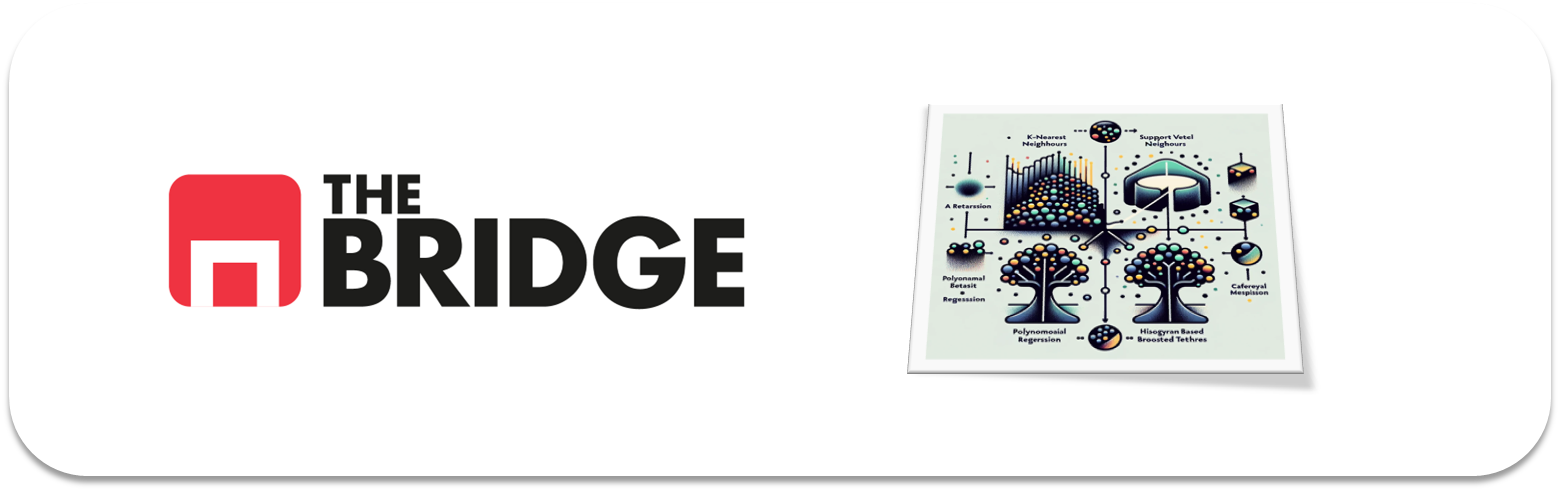

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import bootcampviztools as bt
import toolbox_ML as tb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [6]:
df_wines = pd.read_csv("./data/wines_dataset.csv", sep= "|")
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [7]:
df_wines.shape

(6497, 13)

In [22]:
tb.describe_df(df_wines)

,COL_N,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,106,187,89,316,214,135,276,998,108,111,111,7,2
3,CARDIN (%),1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [ ]:
#Seleccionamos las variables target de cada problema:
clas_target = "class"
reg_target = "alcohol"

#Seleccionamos las features para el problema de clasificiación
clas_features = df_wines.columns.to_list()
clas_features.remove(clas_target)

#Seleccionamos las features para el problema de regresión
reg_features = df_wines.columns.to_list()
reg_features.remove(reg_target)

#### División train/test
*Creamos dos juegos de sets train y test para cada problema*

In [19]:
# Split para clasificación:

clas_train_set, clas_test_set = train_test_split(df_wines, test_size=0.2, stratify=df_wines[clas_target], random_state=42)

print(clas_train_set.shape)
print(clas_test_set.shape)

(5197, 13)
(1300, 13)


In [21]:
#Split para regresión: 

reg_train_set, reg_test_set = train_test_split(df_wines, test_size=0.2, random_state=42) #No se puede estratificar porque hay clases que tienen sólo un valor. Se pide mínimo 2 de cada clase.

print(reg_train_set.shape)
print(reg_test_set.shape)

(5197, 13)
(1300, 13)


#### Distribución de targets: Class y Alcohol

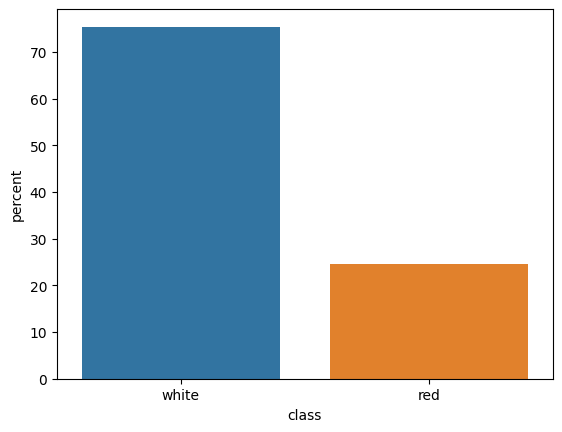

In [26]:
sns.countplot(clas_train_set, x=clas_train_set[clas_target], hue=clas_target, stat="percent"); #Mostramos la frecuencia relativa porque está desbalanceado.

<Axes: xlabel='alcohol', ylabel='Count'>

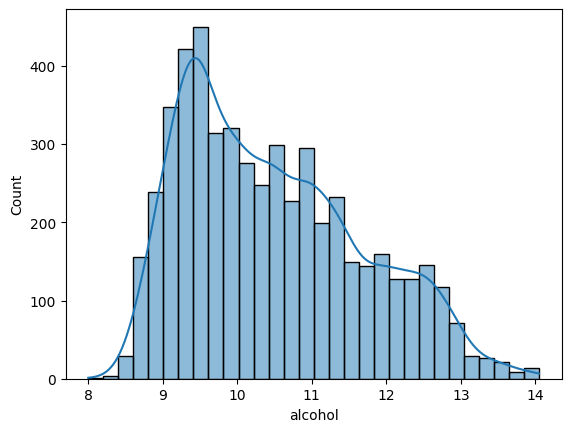

In [29]:
sns.histplot(reg_train_set[reg_target], kde=True)

#### Assesment problema de clasificación:
*Tendremos que clasificar los vinos según sean blancos o tintos, por tanto diremos que estamos ante un problema de clasificación binaria. Cuando llegue el momento, trataremos la varibale categórica para transformarla en binaria (blancos = 0; tintos = 1). También nos encontramos con que el target está desbalanceado en un 75-25 aproximadamente según la gráfica, tendremos que recurrir a técnicas de ajustes*

*Al mismo tiempo se no pide explicitamente desde negocio que utilicemos el recall medio como medida de evaluación.*

#### Assesment problema de regresión: 
*En este problema se plantea predecir el grado de alcohol que tendrá un vino según el resto de características. Para ello recurriremos a algoritmos de regresión.*
*Para este caso, recurriremos a MAE para evaluar el modelo.*

### Mini-Eda:
##### Análisis bivariante target - features para el problema de clasificiación:

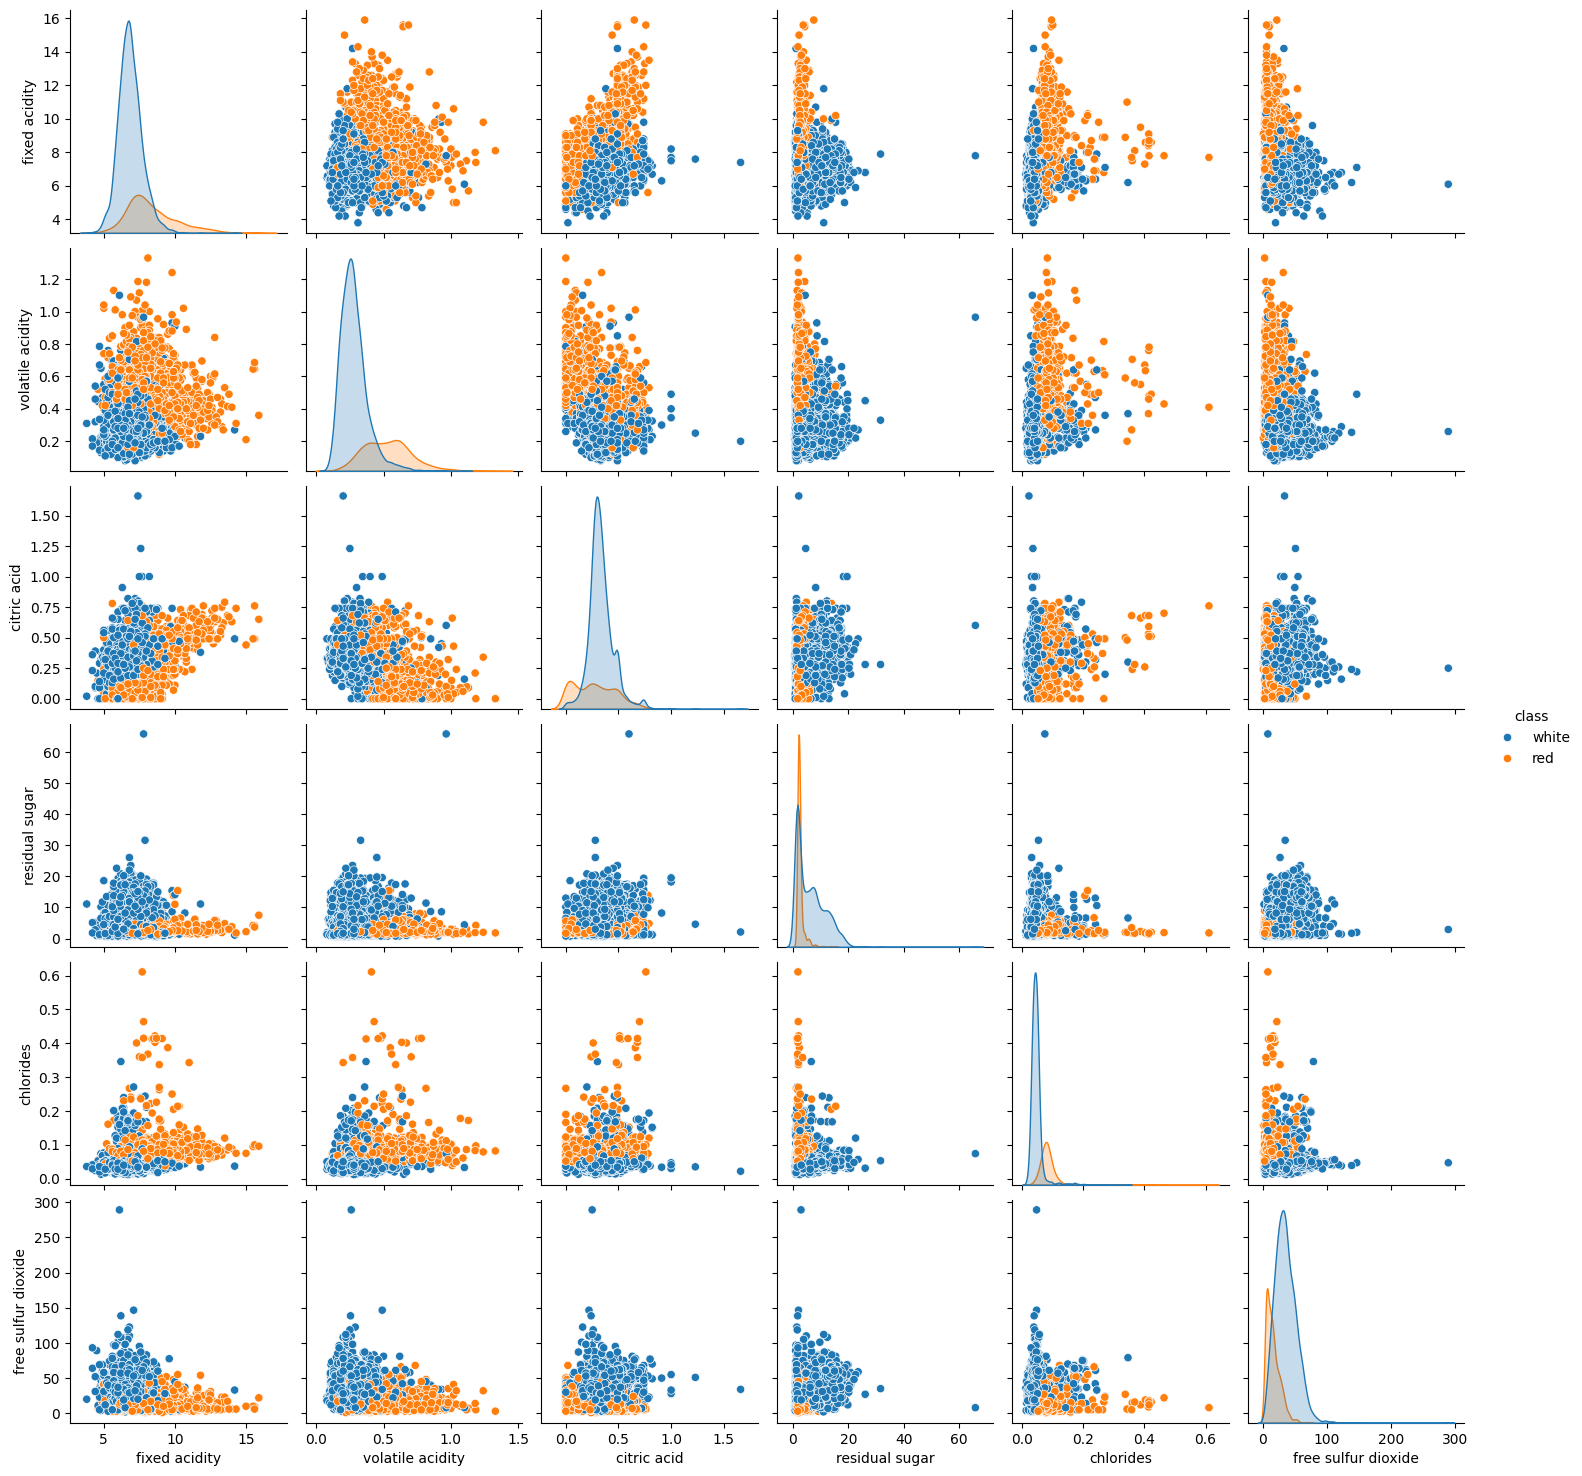

In [31]:
sns.pairplot(clas_train_set[clas_features[0:6] + [clas_target]], hue=clas_target) #Dividimos en grupos para visualizar mejor. Son 12 columnas sin contar el target, hacemos grupos de 6.

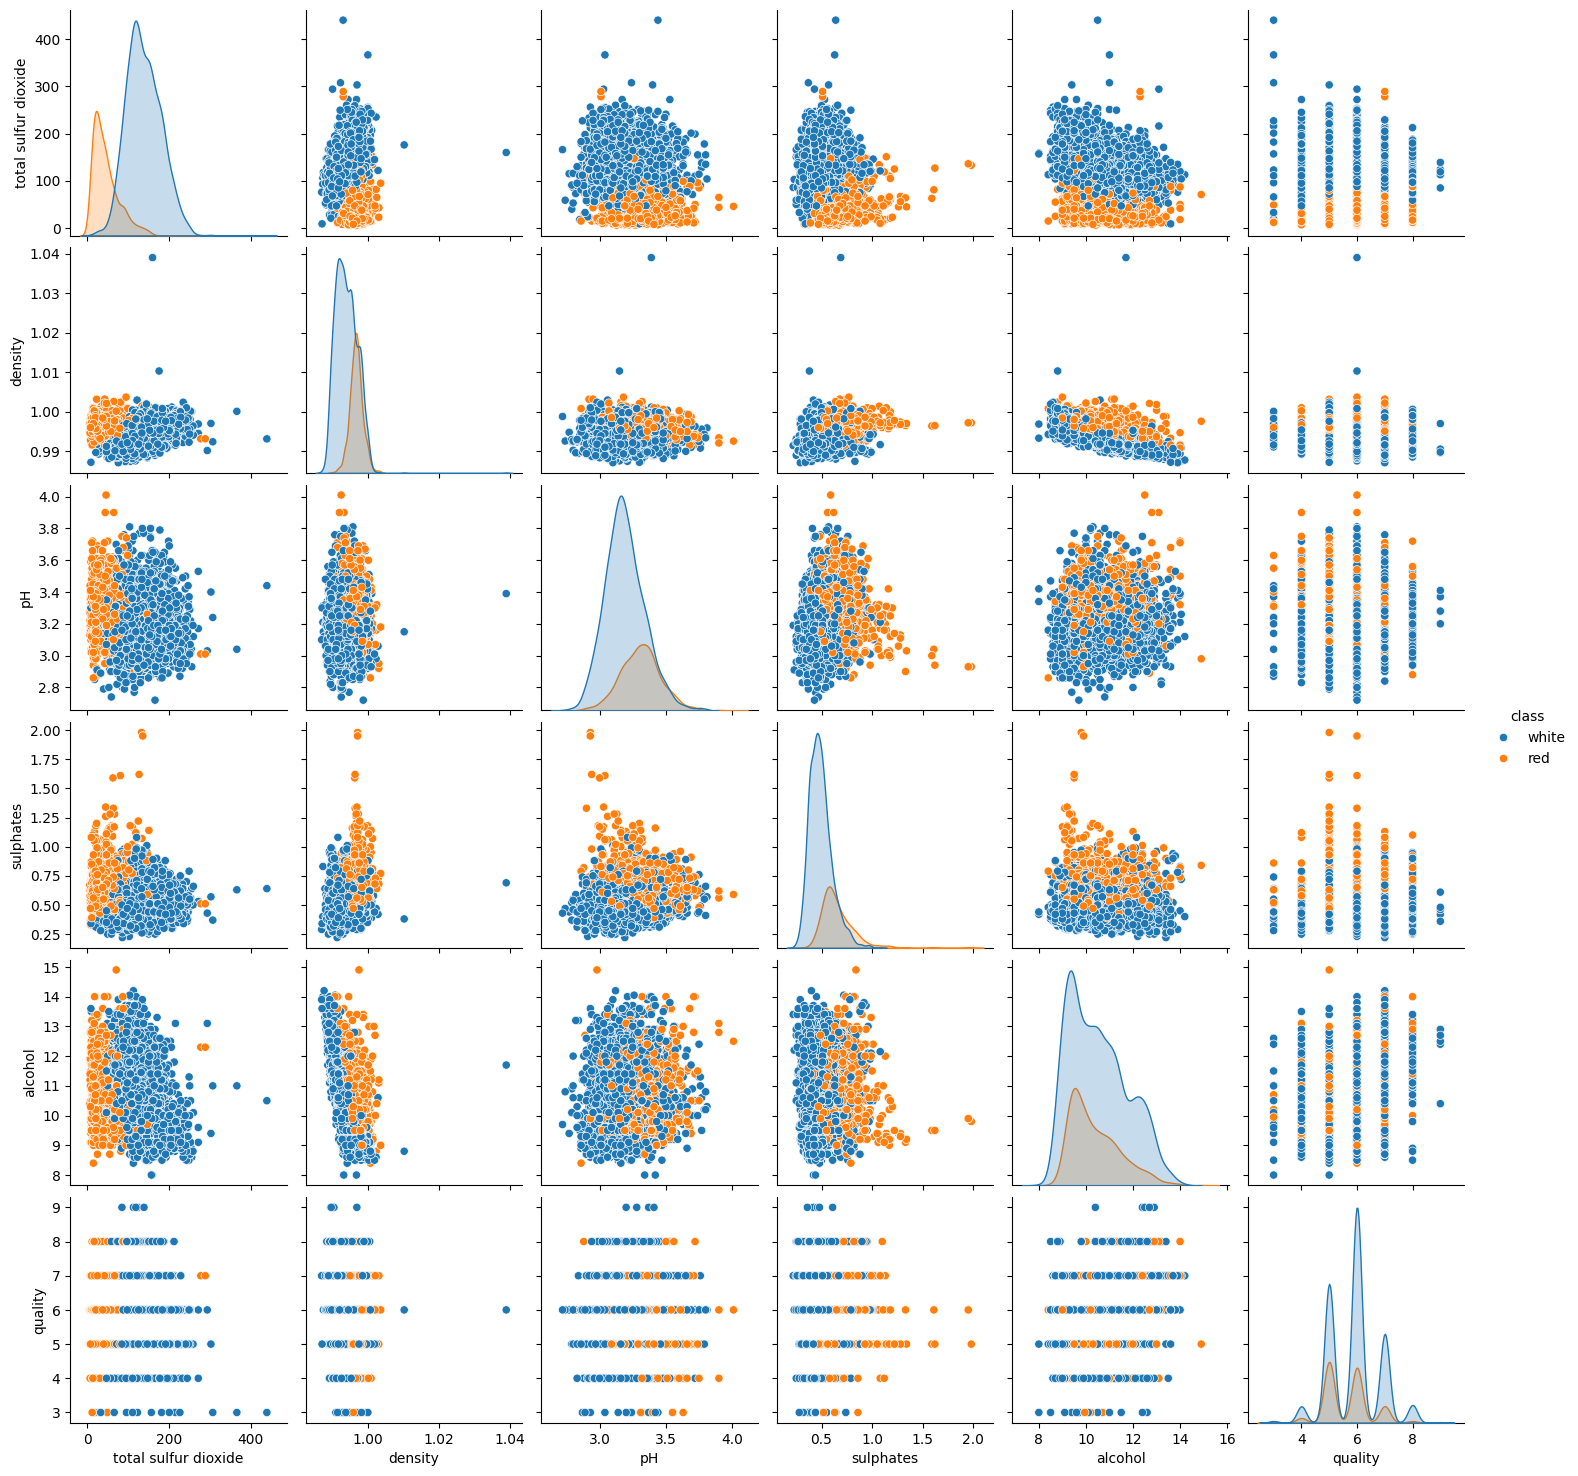

In [32]:
sns.pairplot(clas_train_set[clas_features[6:12] + [clas_target]], hue=clas_target)

In [36]:
# Vamos a prescindir de ['quality', 'alcohol', 'pH'] porque presentan una distribución muy solapada entre ambas clases y queremos reducir el número de features para entrenar. 

select_clas_features = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density', # la apunto como prescindible
 'sulphates', # la apunto como prescindible
 ]

<Figure size 1500x3000 with 0 Axes>

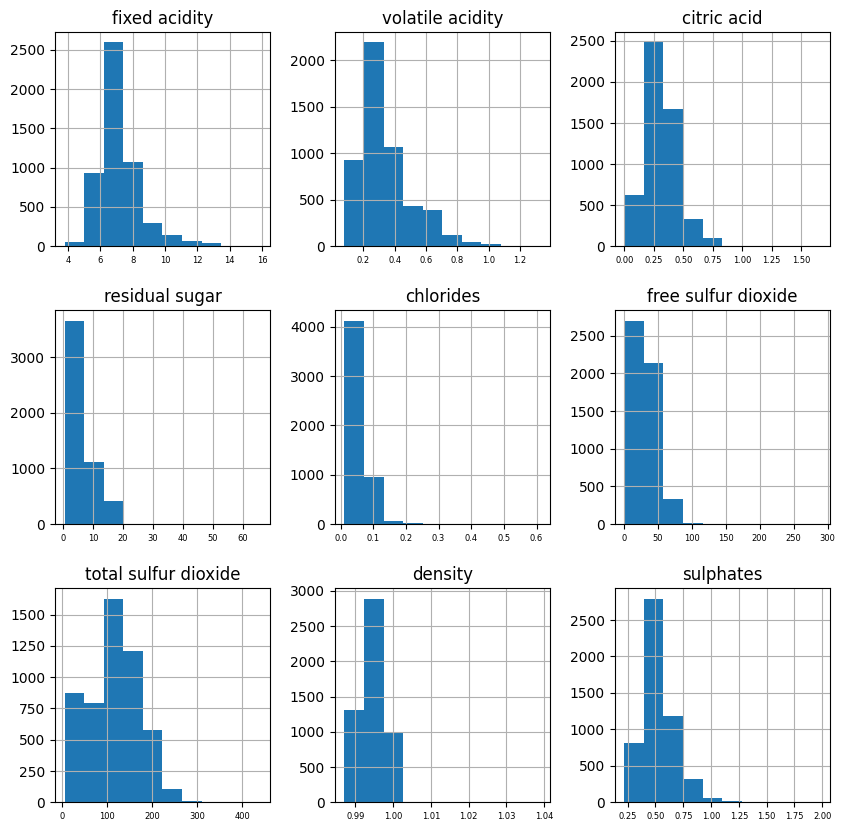

In [71]:
plt.figure(figsize=(15,30))
clas_train_set[select_clas_features].hist(figsize=(10,10));


#### Tratamiento de fetures para el para el problema de clasificación:
*Aplicamos transformación logarítmica a todas las features. Posteriormente, escalaremos ya que para nuestro baseline (KNN) necesitaremos un set escalado.*
*El desbalanceo lo trataremos directamente con los hiperparámentros de cada modelo*

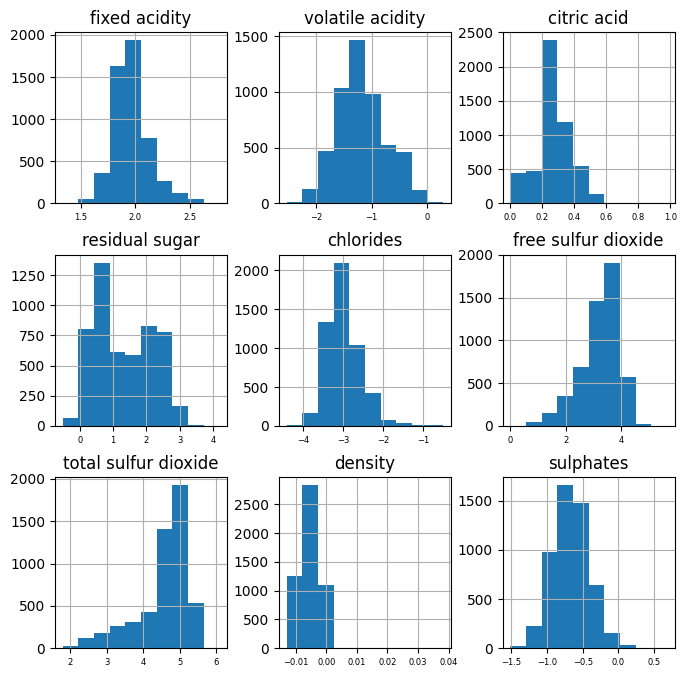

In [82]:
clas_train_set_scaled = clas_train_set.copy()
clas_test_set_scaled = clas_test_set.copy()

select_clas_features_transformed = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates']

for col in select_clas_features_transformed:
    suma = 0
    if clas_train_set_scaled[col].min() <= 0:
        suma = int(abs(clas_train_set_scaled[col].min())) +1
    clas_train_set_scaled[col] = np.log(clas_train_set_scaled[col] + suma)
    clas_test_set_scaled[col] = np.log(clas_test_set_scaled[col] + suma)

clas_train_set_scaled[select_clas_features_transformed].hist(figsize=(8,8));



In [83]:
# Escalamos:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

clas_train_set_scaled[select_clas_features_transformed] = scaler.fit_transform(clas_train_set_scaled[select_clas_features_transformed])
clas_test_set_scaled[select_clas_features_transformed] = scaler.transform(clas_test_set_scaled[select_clas_features_transformed])

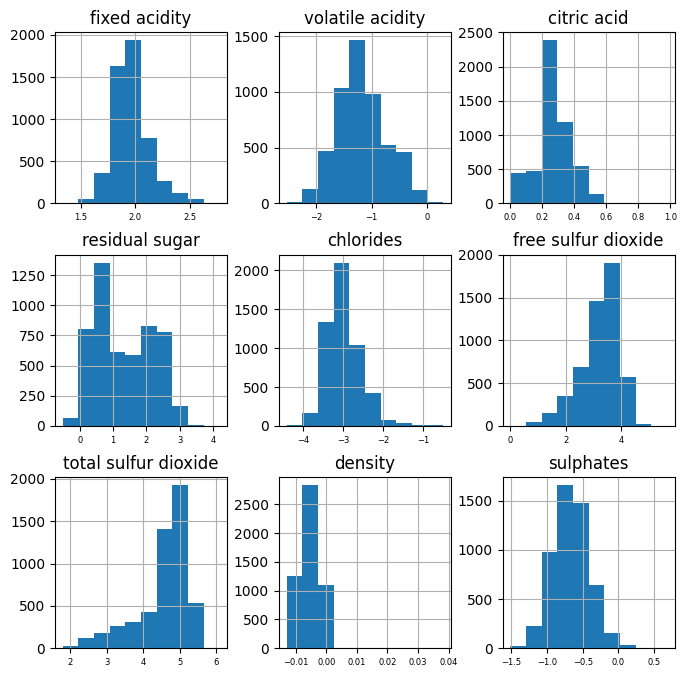

In [100]:
# me saco otro juego de variables transformadas sin escalar para los modelos RandomforestClassifier y LighGBM. 

clas_train_set_trans = clas_train_set.copy()
clas_test_set_trans = clas_test_set.copy()

select_clas_features_transformed = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates']

for col in select_clas_features_transformed:
    suma = 0
    if clas_train_set_trans[col].min() <= 0:
        suma = int(abs(clas_train_set_trans[col].min())) +1
    clas_train_set_trans[col] = np.log(clas_train_set_trans[col] + suma)
    clas_test_set_trans[col] = np.log(clas_test_set_trans[col] + suma)

clas_train_set_trans[select_clas_features_transformed].hist(figsize=(8,8));

#### Mini EDA 
##### Análisis bivariante target - features para el problema de regresión:

In [73]:
# Vemos la correlación con el target 'alcohol'

corr = reg_train_set.corr(numeric_only=True)
np.abs(corr[reg_target].sort_values(ascending=False))

alcohol                 1.000000
quality                 0.450403
pH                      0.116497
sulphates               0.000412
citric acid             0.005690
volatile acidity        0.036041
fixed acidity           0.091964
free sulfur dioxide     0.188460
chlorides               0.260508
total sulfur dioxide    0.272970
residual sugar          0.357459
density                 0.682345
Name: alcohol, dtype: float64

<Axes: >

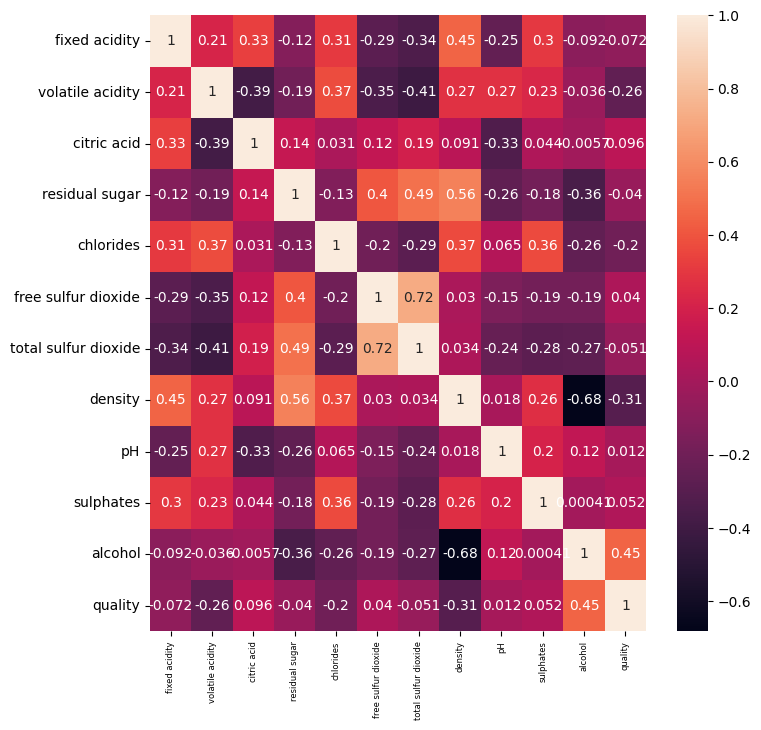

In [74]:
# Comprobamos la correlación que tienen entre sí
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

*Total sulfur dioxide y free sulfur dioxide tienen una alta correlación entre sí. A su vez residual sugar también tienen correlaciones importantes con Total sulfur dioxide y density*

#### Tratamiento de feactures para el problema de regresión: 
*Aquí convertiremos la variable class a binaria y aplicaremos transformación logarítmica las variables no crearemos un set escalado, ya que los modelos que vamos a utilizar no lo necesitan.*

In [90]:
reg_train_set["class_binaria"] = reg_train_set["class"].apply(lambda x: 1 if x == "red" else 0) # 1 = red, 0 = white
reg_test_set["class_binaria"] = reg_train_set["class"].apply(lambda x: 1 if x == "red" else 0) # 1 = red, 0 = white

reg_train_set_num = reg_train_set.copy() #hacemos una copia para eliminar la columna categórica.
reg_test_set_num = reg_test_set.copy()

reg_train_set_num.drop(["class"], axis=1, inplace=True)
reg_test_set_num.drop(["class"], axis=1, inplace=True)

reg_train_set_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_binaria
1916,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5,1
947,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,6,0
877,7.6,0.51,0.24,1.2,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,6,0
2927,6.0,0.25,0.28,7.7,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6,0
6063,9.0,0.38,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7,1


In [96]:
# Excluimos a las variables que tengan una alta correlación entre sí:

selec_reg_features = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar', # Por el momento la dejamos. 
 'chlorides',
 'density',
 'pH',
 'sulphates',
 'quality',
 'class_binaria']


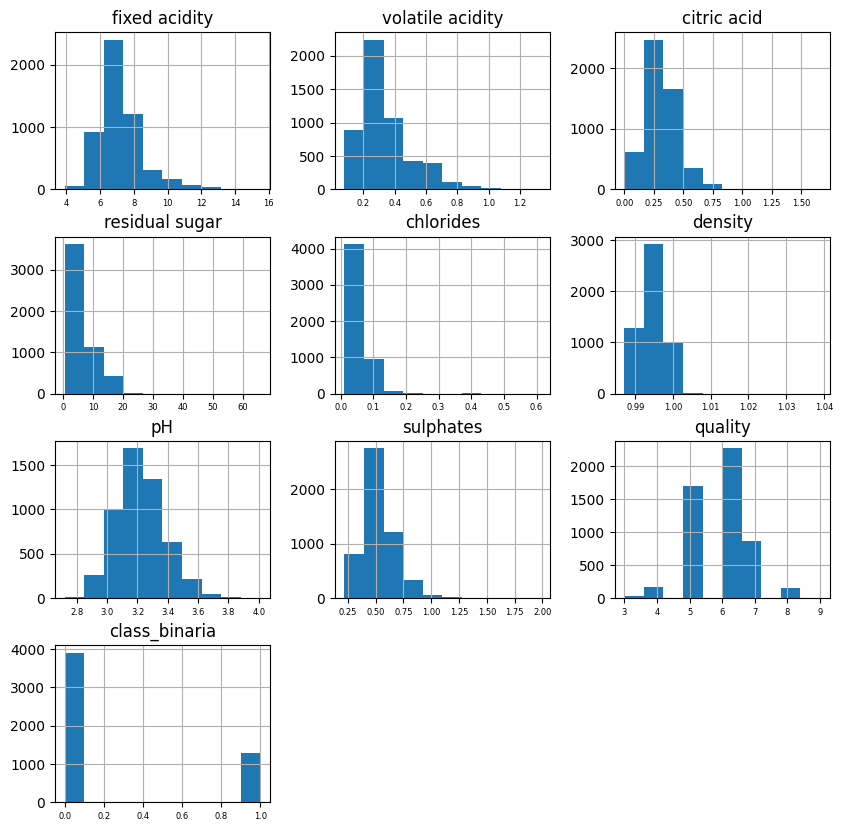

In [97]:
reg_train_set_num[selec_reg_features].hist(figsize=(10,10));

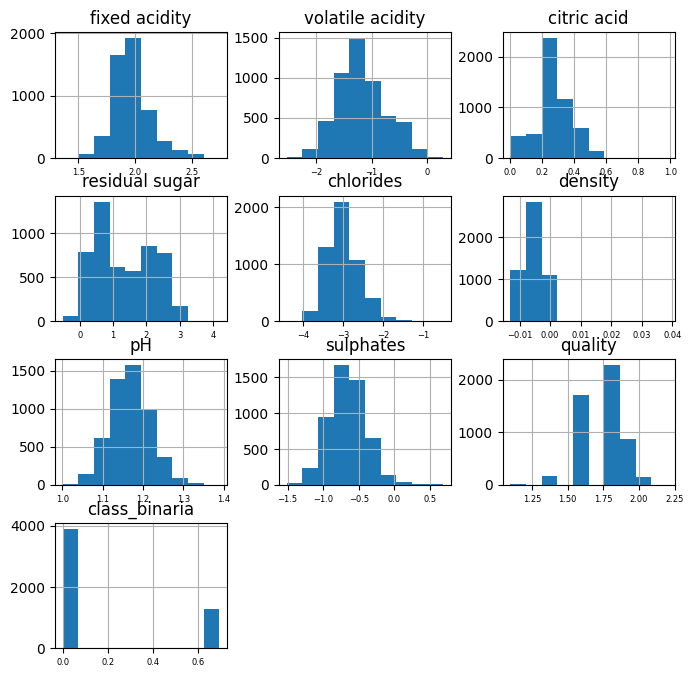

In [99]:
reg_train_set_trans = reg_train_set_num.copy()
reg_test_set_trans = reg_test_set_num.copy()

select_reg_features_transformed = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar', 
 'chlorides',
 'density',
 'pH',
 'sulphates',
 'quality',
 'class_binaria']

for col in select_reg_features_transformed:
    suma = 0
    if reg_train_set_trans[col].min() <= 0:
        suma = int(abs(reg_train_set_trans[col].min())) +1
    reg_train_set_trans[col] = np.log(reg_train_set_trans[col] + suma)
    reg_test_set_trans[col] = np.log(reg_test_set_trans[col] + suma)

reg_train_set_trans[select_reg_features_transformed].hist(figsize=(8,8));

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

#### Separación de sets en X e y

In [133]:
#Como hemos hecho en el tratamiento de los datos del problema de reguresión para la variable categórica, replicamos lo mismo para este problema de clasificación. 
# Lo hacemos para ambos sets, el escalado y el no escalado:

clas_train_set_scaled["class_binaria"] = clas_train_set["class"].apply(lambda x: 1 if x == "red" else 0) # 1 = red, 0 = white
clas_test_set_scaled["class_binaria"] = clas_train_set["class"].apply(lambda x: 1 if x == "red" else 0) # 1 = red, 0 = white

clas_train_set_trans["class_binaria"] = clas_train_set["class"].apply(lambda x: 1 if x == "red" else 0) # 1 = red, 0 = white
clas_test_set_trans["class_binaria"] = clas_train_set["class"].apply(lambda x: 1 if x == "red" else 0) # 1 = red, 0 = white

clas_train_set_num_scaled = clas_train_set_scaled.copy() #hacemos una copia para eliminar la columna categórica.
clas_test_set_num_scaled = clas_train_set_scaled.copy()

clas_train_set_num_trans = clas_train_set_trans.copy() #hacemos una copia para eliminar la columna categórica.
clas_test_set_num_trans = clas_train_set_trans.copy()

clas_train_set_num_scaled.drop(["class"], axis=1, inplace=True)
clas_test_set_num_scaled.drop(["class"], axis=1, inplace=True)
clas_train_set_num_trans.drop(["class"], axis=1, inplace=True)
clas_test_set_num_trans.drop(["class"], axis=1, inplace=True)

clas_target_binaria = "class_binaria"

#train_knn, test_knn = SMOTE(random_state=42).fit_resample(clas_train_set_num_scaled, clas_test_set_num_scaled) -----> da error 

#Sacamos un juego para KNN:
X_train_clas_scaled = clas_train_set_num_scaled[select_clas_features_transformed]
X_test_clas_scaled = clas_test_set_num_scaled[select_clas_features_transformed]
y_train_clas_scaled = clas_train_set_num_scaled[clas_target_binaria] 
y_test_clas_scaled = clas_test_set_scaled[clas_target_binaria]


#Sacamos otro juego para RandomForestClassifier y LightGBM, sin escalar:
X_train_clas = clas_train_set_num_trans[select_clas_features_transformed]
X_test_clas = clas_test_set_num_trans[select_clas_features_transformed]
y_train_clas = clas_train_set_num_trans[clas_target_binaria] 
y_test_clas = clas_test_set_num_trans[clas_target_binaria]


#### Comparativa de modelos:

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

knn_baseline = KNeighborsClassifier(n_neighbors=3, weights="distance") #uso hiperparametro weight para intentar balancear mientras encuentro fallo de SMOTE
knn_bis = KNeighborsClassifier(n_neighbors=7, weights="distance")
lgbm_clas = LGBMClassifier(max_depth=3, random_sate = 42, verbose = -100, is_umbalance=True )
rf_clas = RandomForestClassifier(max_depth= 3, random_state= 42, class_weight="balanced")

#Hacemos validación cruzada para los modelos seleccionados con cv = 5.

modelos_knn = {
          "KNN_baseline": knn_baseline,
          "KNN_7_vecinos": knn_bis
          }

modelos = {
    "Ramdon Forest" : rf_clas,
          "LGBM": lgbm_clas
          }

for tipo,modelo in modelos_knn.items():
    print(f"{tipo}: ", end = " ")
    print(np.mean(cross_val_score(modelo, X_train_clas_scaled, y_train_clas_scaled, cv = 5, scoring = "balanced_accuracy")))

for tipo, modelo in modelos.items():
    print(f"{tipo}: ", end = " ")
    print(np.mean(cross_val_score(modelo, X_train_clas, y_train_clas, cv = 5, scoring = "balanced_accuracy")))


KNN_baseline:  0.9902783152293484
KNN_7_vecinos:  0.9915820110371734
Ramdon Forest:  0.9824045044262917
LGBM:  0.9910280032750647


*Habrá que revisar todo lo hecho anteriormente, porque todos los valores son muy altos y puede que haya overfiting*

#### Optimización de Hiperparámetros:
*Vamos a optimizar los hiperparámetros de LightGBClassifier. KNN tiene la puntuación más alta a medida que hemos aumentado el valor de K.*

In [144]:
param_grid = {
    "n_estimators": [100,200,400],
    "learning_rate": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_data_in_leaf": [1,10,20,100],
    "max_bin": [40,80,100]
}


lgbm_grid = GridSearchCV(lgbm_clas, 
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

lgbm_grid.fit(X_train_clas,y_train_clas)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(is_umbalance=True, max_depth=3,
                                      random_sate=42, verbose=-100),
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 1],
                         'max_bin': [40, 80, 100],
                         'max_depth': [1, 6, 10, None],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='balanced_accuracy')

In [145]:
lgbm_grid.best_params_

{'learning_rate': 1,
 'max_bin': 40,
 'max_depth': 10,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [147]:
lgbm_grid.best_score_

0.9928581728428918

#### Evaluación:

In [149]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = lgbm_grid.best_estimator_.predict(X_test_clas)
print(classification_report(y_test_clas, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3918
           1       1.00      1.00      1.00      1279

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



*Claramente hay overfiting, hay que repasar el modelo*

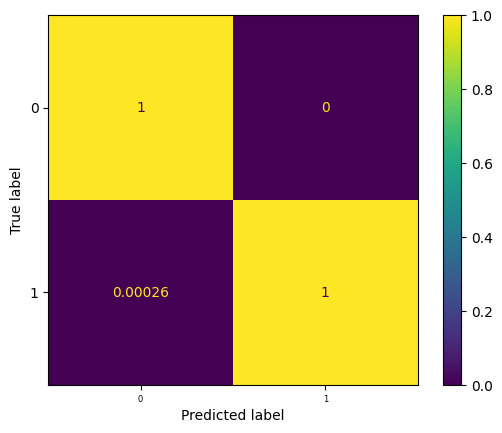

In [150]:
ConfusionMatrixDisplay.from_predictions(y_test_clas, y_pred, normalize= "pred")

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

#### Separación X e y:

In [152]:
X_train_reg = reg_train_set_trans[select_reg_features_transformed]
X_test_reg = reg_test_set_trans[select_reg_features_transformed]
y_train_reg = reg_train_set_trans[reg_target]
y_test_reg = reg_train_set_trans[reg_target]

In [151]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [154]:
rf_reg = RandomForestRegressor(max_depth = 10, random_state= 42) 
xgb_reg = XGBRegressor(max_depth = 10, random_state = 42)
lgb_reg = LGBMRegressor(max_depth = 10, random_state = 42, verbose = -100)


modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}

#Vamos a ver el MAE para cada modelo:

for tipo, modelo in modelos.items():
    print(f"{tipo}: ", end = " ")
    print(np.mean(cross_val_score(modelo, X_train_clas, y_train_clas, cv = 5, scoring = "neg_mean_absolute_error")))

Random Forest:  -0.019472178595794823
Lightgbm:  -0.027705876089842672
XGBoost:  -0.01737818495592203


*XGBoost tienen un MAE negativo menor, por tanto escogeremos este para optimizarlo.*

In [157]:
param_grid = {
       'n_estimators': [50, 100, 200],
       'learning_rate': [0.01, 0.05, 0.1],
       'max_depth': [3, 5, 7],
       'subsample': [0.6, 0.8, 1.0],
       'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_reg,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "neg_mean_absolute_error")

xgb_grid.fit(X_train_reg, y_train_reg)

c:\Users\bnove\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=10, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [160]:
xgb_grid.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 0.8}

In [161]:
xgb_grid.best_score_

-0.25098898315496293

#### Evaluación:

In [ ]:
y_pred = xgb_grid.best_estimator_.predict(X_test_reg)
print("MAE:", mean_absolute_error(y_test_reg, y_pred))
print("RSME:", np.sqrt(mean_squared_error(y_test_reg, y_pred)))

In [ ]:
#Usamos la función facilitada en los ejercicios:

def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

plot_predictions_vs_actual(y_test_reg, y_pred)